# 합성곱 신경망의 시각화
#### 핵심 키워드: 가중치 시각화, 특성 맵 시각화, 함수형 API

In [1]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')

In [2]:
model.layers

In [3]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [4]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.013545012 0.23138252


In [5]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK']='True'

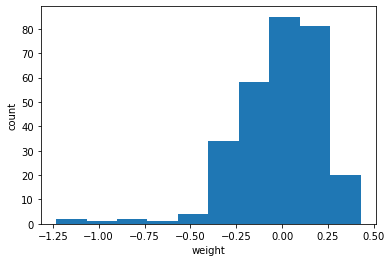

In [14]:
import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

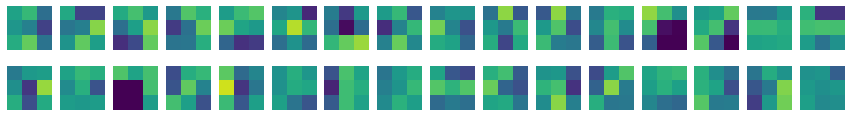

In [13]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

In [8]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [9]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [10]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

-0.0034510714 0.08245789


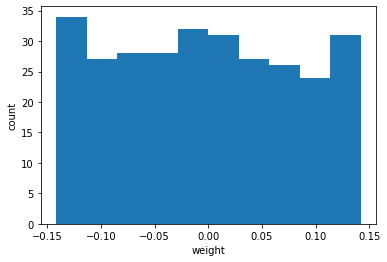

In [15]:
import matplotlib.pyplot as plt

plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

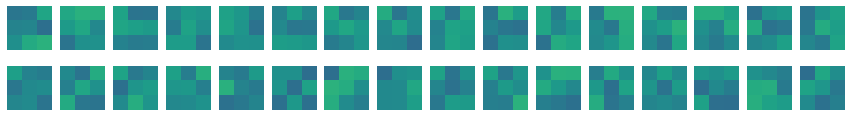

In [16]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

In [17]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [18]:
conv_acti = keras.Model(model.input, model.layers[0].output)

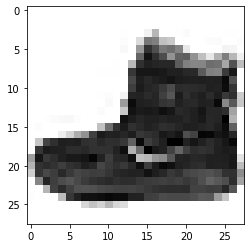

In [19]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [20]:
inputs = train_input[0].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 0s 149ms/step


In [21]:
print(feature_maps.shape)

(1, 28, 28, 32)


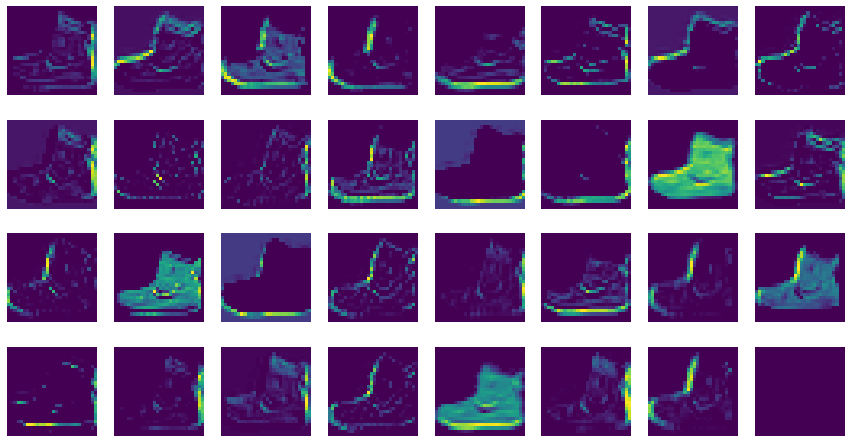

In [22]:
fig, axs = plt.subplots(4, 8, figsize=(15, 8))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0, :, :, i*8 + j])
        axs[i, j].axis('off')
plt.show()

In [ ]:
conv2_acti = keras.Model(model.input, model.layers[2].output)